In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the CSV files into DataFrames
rossmann_store = pd.read_csv('Rossmann_store.csv')
rossmann_train = pd.read_csv('Rossmann_train.csv', dtype={'StateHoliday': str})

#pd.read_csv()函数：pandas库提供的read_csv函数用于从CSV文件读取数据并将其转换为DataFrame对象。
#DataFrame是pandas中的一种数据结构，用于以表格形式存储数据

# dtype={'StateHoliday': str}：这是一个关键字参数，用于指定某列或某些列的数据类型。
# 在这个例子中，它指定StateHoliday列的数据应该被解读和存储为字符串类型。
# 这通常是因为即使某些列看起来包含数字，它们实际上可能代表的是分类或文本信息，比如表示节假日类型的代码。（0，1，a,b）
# 通过明确指定数据类型，可以避免在后续的数据处理和分析中出现数据类型不一致的问题。

In [3]:
print("\nRossman Train Data:")
rossmann_train.head()

# \n是一个特殊的字符序列，代表一个换行符。它用于在输出文本中插入一个新行，使得接下来的内容从新的一行开始显示。
# 因此，这段代码的作用是先在控制台输出一个空行，然后在下一行输出文本“Rossmann Store Data:”。


Rossman Train Data:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
print("\nRossmann Store Data:")
rossmann_store.head()


Rossmann Store Data:


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
rossmann_train.shape

# 在Python的pandas库中，DataFrame对象有一个属性.shape
# 这行代码返回一个包含两个元素的元组，分别表示rossmann_train这个DataFrame的行数和列数。

(1017209, 9)

In [6]:
rossmann_store.shape

(1115, 10)

In [7]:
rossmann_train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [8]:
rossmann_store.isnull().sum()

# pandas库中，  .isnull().sum()这行代码用于检测DataFrame中的缺失值，并对每列的缺失值进行求和。

# rossmann_train.isnull()：这个方法返回一个与rossmann_train形状相同的布尔型DataFrame，
# 其中的元素为True时表示相应位置的值是缺失的（即NaN），为False时表示相应位置的值是非缺失的。

# .sum()：接着，对布尔型DataFrame应用.sum()方法。由于在布尔型数组中，True被当作1，False被当作0，
# .sum()方法会计算每列True的总数，也就是每列缺失值的数量。

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [9]:
rossmann_store = rossmann_store.dropna()

#panda库处理缺失值 

# dropna()方法：在没有任何参数的情况下，dropna()会移除数据集中所有包含至少一个NaN值的行。
# 这意味着如果一个行中的任何一列有缺失值，整个行都会被删除。


# 请注意，虽然这种处理缺失值的方法很简单，但它可能导致大量数据的丢失，特别是当数据集中许多行都至少有一个缺失值时。
# 在决定删除缺失值之前，建议先评估缺失值的分布和对分析的影响，或考虑其他处理缺失值的方法！
# 例如填充缺失值（使用均值、中位数、众数等）或使用模型预测缺失值。

In [ ]:
# 1. 填充缺失值（均值mean、中位数median、众数mode）：

# 当数据丢失随机发生且丢失量不大时：
# 如果数据的缺失是随机的，并且不代表任何潜在的模式，使用均值、中位数或众数填充可能是一个快速简便的解决方案。
# 当缺失值不影响数据分布时：如果用均值、中位数或众数填充缺失值不会显著改变数据的整体分布，这种方法可以被采用。

# 对于数值型value特征：
# 对于数值型特征，均值和中位数填充是常用的策略。均值适用于数据分布较为正态的情况，而中位数适用于数据分布偏斜（如存在离群值）的情况。

# 对于分类str特征：
# 对于缺失的分类数据，众数（最常出现的值）填充是一种常见的方法。






# 2. 使用模型预测缺失值：

# 当缺失数据较多 或 具有潜在模式时：
# 如果缺失数据较多，或者缺失的数据与其他变量之间存在潜在的相关性，可以使用模型（如线性回归、决策树、K最近邻等）来预测缺失值。

In [ ]:
#举例：

#mean
# 假设`sales`是一个数值型列
# rossmann_store['sales'] = rossmann_store['sales'].fillna(rossmann_store['sales'].mean())

#median中位数
# 假设`customers`是一个数值型列
# rossmann_store['customers'] = rossmann_store['customers'].fillna(rossmann_store['customers'].median())

#mode众数
# 假设`StateHoliday`是一个分类型列
# mode_value = rossmann_store['StateHoliday'].mode()[0] # 众数可能返回多个值，取第一个
# rossmann_store['StateHoliday'] = rossmann_store['StateHoliday'].fillna(mode_value)


In [10]:
# Data Integration
# Merge "rossmann_train" and "rossmann_store" DataFrames
df_rossman = pd.merge(rossmann_train, rossmann_store, on='Store', how='inner')

# on='Store'：指定合并依据的列名。这里，'Store'列被用作连接两个DataFrame的键。
# 这意味着pandas会查找rossmann_train和rossmann_store中'Store'列的匹配值，并基于这些匹配值来合并行。

# how='inner'：指定合并的方式。
# 内连接（inner）意味着只有当rossmann_train和rossmann_store中都存在相应的'Store'值时，对应的行才会出现在合并后的DataFrame中。
# 如果某个'Store'值在其中一个DataFrame中存在而在另一个中不存在，则该Store的数据不会出现在结果中


# Convert Date to datetime format and Create a new column with the name of the day
df_rossman['Date'] = pd.to_datetime(df_rossman['Date']) 
# 这一行将df_rossman中的Date列从其原始格式（可能是字符串或其他格式）转换为Python的datetime对象（日期）

df_rossman['DayOfWeekName'] = df_rossman['Date'].dt.day_name()
# 这一行为每个日期生成了对应的星期名称（如"Monday", "Tuesday"等），并将这些名称存储在新的列DayOfWeekName中。
# 这里.dt访问器是pandas中专门用于处理datetime对象的属性，day_name()函数则是用来获取日期对应的星期名称。

# 如果你想要给DataFrame添加一个列，显示每个日期所对应的月份名称，可以这样做：
# df_rossman['MonthName'] = df_rossman['Date'].dt.month_name()


df_rossman = df_rossman.set_index(pd.to_datetime(df_rossman['Date']))
# set_index将df_rossman的索引设置为Date列


df_rossman


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeekName
Date,,,,,,,,,,,,,,,,,,,
2015-07-31,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Friday
2015-07-30,2,4,2015-07-30,5567,601,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Thursday
2015-07-29,2,3,2015-07-29,6402,727,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Wednesday
2015-07-28,2,2,2015-07-28,5671,646,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Tuesday
2015-07-27,2,1,2015-07-27,6627,638,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-05,1111,6,2013-01-05,3325,291,1,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",Saturday
2013-01-04,1111,5,2013-01-04,4640,453,1,0,0,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",Friday
2013-01-03,1111,4,2013-01-03,4579,444,1,0,0,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",Thursday


In [11]:
# Display the first few rows of the merged_data DataFrame to verify the changes
df_rossman.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeekName
Date,,,,,,,,,,,,,,,,,,,
2015-07-31,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Friday
2015-07-30,2,4,2015-07-30,5567,601,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Thursday
2015-07-29,2,3,2015-07-29,6402,727,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Wednesday
2015-07-28,2,2,2015-07-28,5671,646,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Tuesday
2015-07-27,2,1,2015-07-27,6627,638,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Monday


In [12]:
df_rossman.shape

(324326, 19)

In [13]:
df_rossman.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
DayOfWeekName                0
dtype: int64

## correlation map

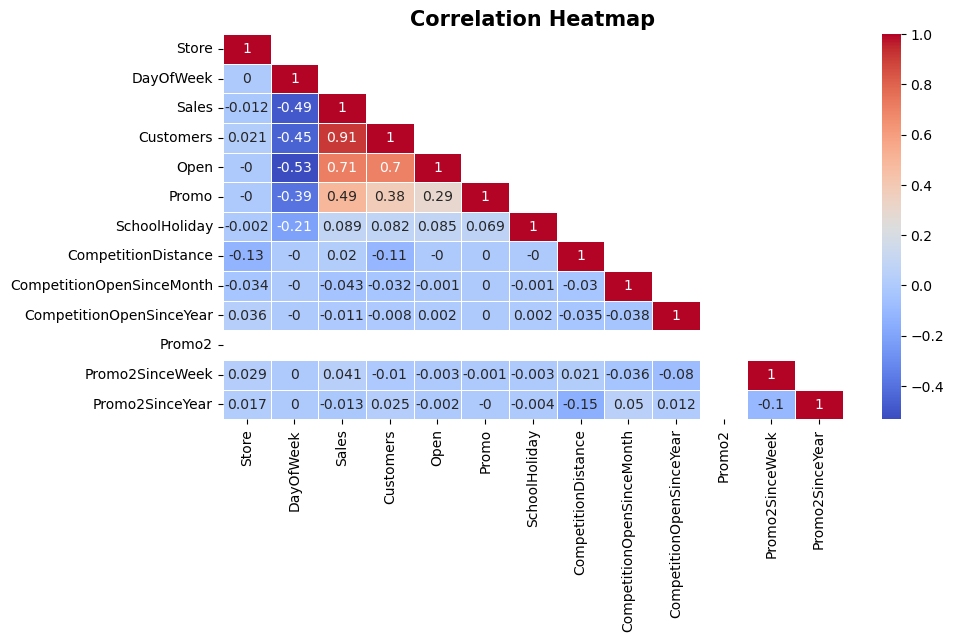

In [14]:
# Calculate the correlation table
corr = df_rossman.corr().round(3) 
# .round(3)将相关系数四舍五入到小数点后三位

# Create a mask to exclude the diagonal
mask = np.triu(np.ones_like(corr, dtype=bool), k=1) 
# 创建掩码以排除对角线，遮掉右上重复显示的内容


plt.figure(figsize=(10,5))
sns.heatmap(data=corr, annot=True, mask=mask, linewidths=0.5, cmap='coolwarm')
# data=corr指定要可视化的数据是前面计算的相关性矩阵corr。
# annot=True表示在热力图的每个单元格中注释相关系数的实际值。
# mask=mask应用前面创建的掩码，以排除热力图中的对角线和上三角部分，使图形更清晰。
# linewidths=0.5设置单元格之间的线宽。
# cmap='coolwarm'指定颜色映射方案，coolwarm是一种渐变色，蓝色代表低相关性，红色代表高相关性。

plt.title('Correlation Heatmap', fontweight='bold', fontsize=15)
# fontweight='bold'和fontsize=15调整标题的字体权重和大小。

plt.show()

In [ ]:
# ##掩码方式：

# 使用heatmap函数的mask参数配合numpy的triu（上三角矩阵）或tril（下三角矩阵）函数


# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# # 假设df是你的DataFrame，已经计算好了相关性矩阵corr
# corr = df.corr()

# # 直接在heatmap函数中使用numpy的triu函数生成掩码
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr, mask=np.triu(np.ones_like(corr, dtype=np.bool)), annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .8})
# plt.title("Correlation Matrix (Upper Triangle Masked)")
# plt.show()


# 在这个例子中，np.triu(np.ones_like(corr, dtype=np.bool))直接生成了一个上三角形的布尔掩码，
# 其中上三角（包括对角线）部分为True，其余部分为False。
# 传递给mask参数的这个掩码数组将导致heatmap在绘制时忽略（即不显示）上三角部分的相关性值。

## assortment and store type

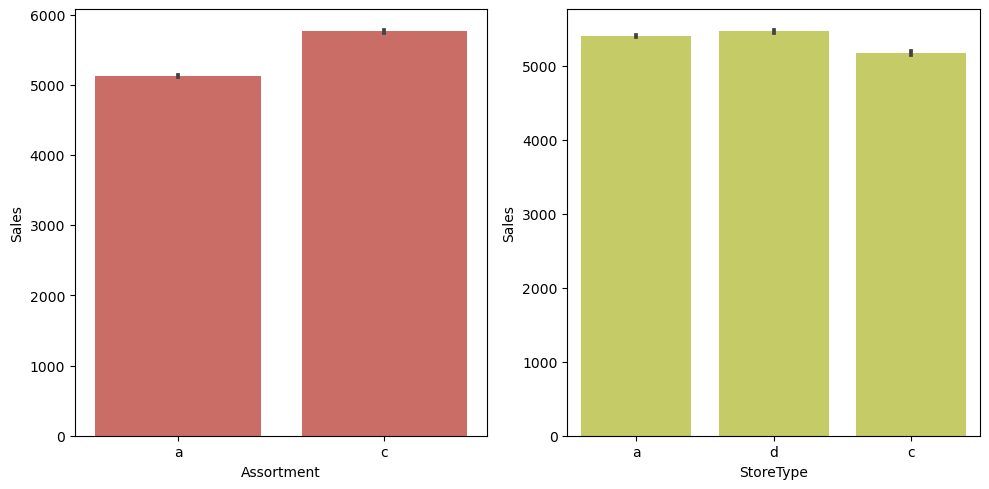

In [15]:
plt.figure(figsize=(10, 5))
# figsize=(10, 5)参数设置大图形（整个画布）的宽度为10英寸和高度为5英寸


# sales vs assortment
plt.subplot(1, 2, 1)
# plt.subplot(1, 2, 1)定义了一个1行2列的子图布局，并指定当前操作的是第一个子图（即左侧的子图）。子图被大图画布所包含！
# 这意味着在这个布局中将会有两个子图，当前绘制的图将放在左侧

sns.barplot(data=df_rossman, x='Assortment',y='Sales', color=sns.color_palette('hls')[0])
# color=sns.color_palette('hls')[0]设置条形图的颜色。sns.color_palette('hls')返回一个颜色列表，[0]选择了这个列表的第一个颜色。
#令x和y 分别代表什么

#seaborn调色见官网：https://seaborn.apachecn.org/9/

# 设置x,y轴标签：
plt.xlabel('Assortment')
plt.ylabel('Sales')




# sales vs store type
plt.subplot(1, 2, 2)
sns.barplot(data=df_rossman,x='StoreType', y='Sales', color=sns.color_palette('hls')[1])
plt.xlabel('StoreType')
plt.ylabel('Sales')


plt.tight_layout()
# plt.tight_layout()函数在matplotlib中用于自动调整子图参数，
# 以便于子图之间填充的空间最小化，同时又保持子图和标签之间的空间足够，
# 从而使得整个图形布局更加紧凑和整洁

## Promotion

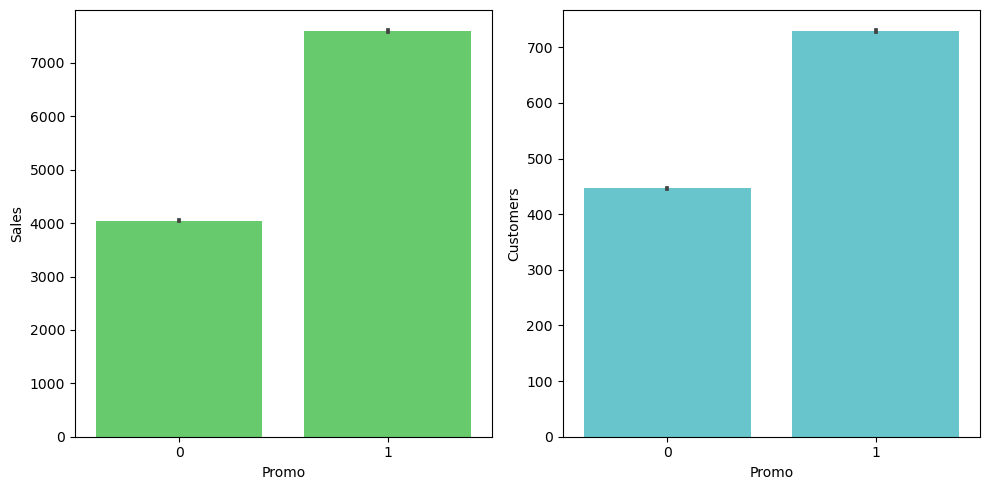

In [16]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df_rossman, x='Promo',y='Sales', color=sns.color_palette('hls')[2])
plt.xlabel('Promo')
plt.ylabel('Sales')

plt.subplot(1, 2, 2)
sns.barplot(data=df_rossman,x='Promo', y='Customers', color=sns.color_palette('hls')[3])
plt.xlabel('Promo')
plt.ylabel('Customers')
plt.tight_layout()

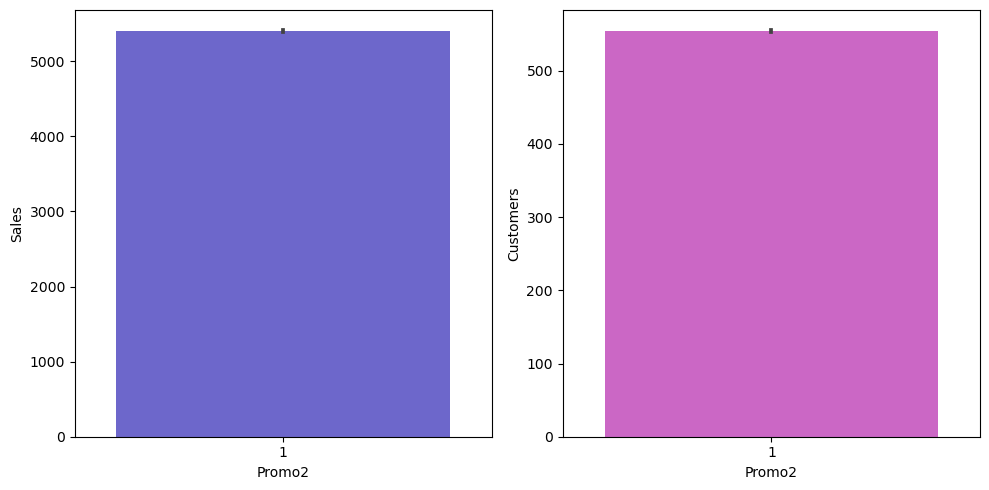

In [17]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df_rossman, x='Promo2',y='Sales', color=sns.color_palette('hls')[4])
plt.xlabel('Promo2')
plt.ylabel('Sales')

plt.subplot(1, 2, 2)
sns.barplot(data=df_rossman,x='Promo2', y='Customers', color=sns.color_palette('hls')[5])
plt.xlabel('Promo2')
plt.ylabel('Customers')
plt.tight_layout()

## Holiday

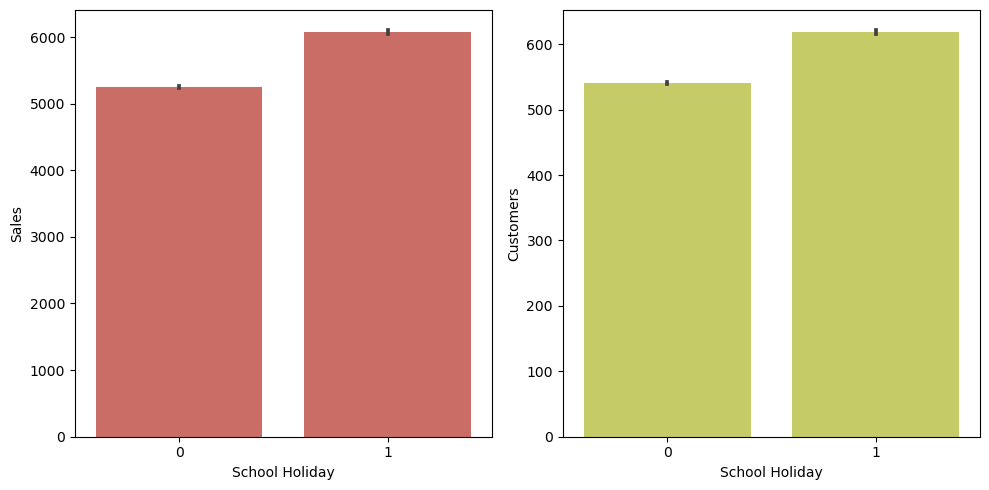

In [18]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df_rossman, x='SchoolHoliday',y='Sales', color=sns.color_palette('hls')[0])
plt.xlabel('School Holiday')
plt.ylabel('Sales')

plt.subplot(1, 2, 2)
sns.barplot(data=df_rossman,x='SchoolHoliday', y='Customers', color=sns.color_palette('hls')[1])
plt.xlabel('School Holiday')
plt.ylabel('Customers')
plt.tight_layout()

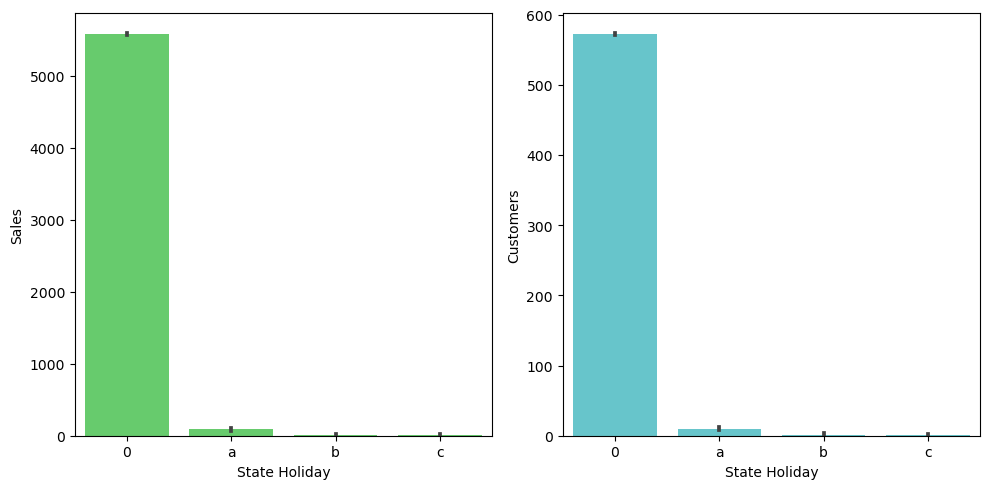

In [19]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df_rossman, x='StateHoliday',y='Sales', color=sns.color_palette('hls')[2])
plt.xlabel('State Holiday')
plt.ylabel('Sales')

plt.subplot(1, 2, 2)
sns.barplot(data=df_rossman,x='StateHoliday', y='Customers', color=sns.color_palette('hls')[3])
plt.xlabel('State Holiday')
plt.ylabel('Customers')
plt.tight_layout()

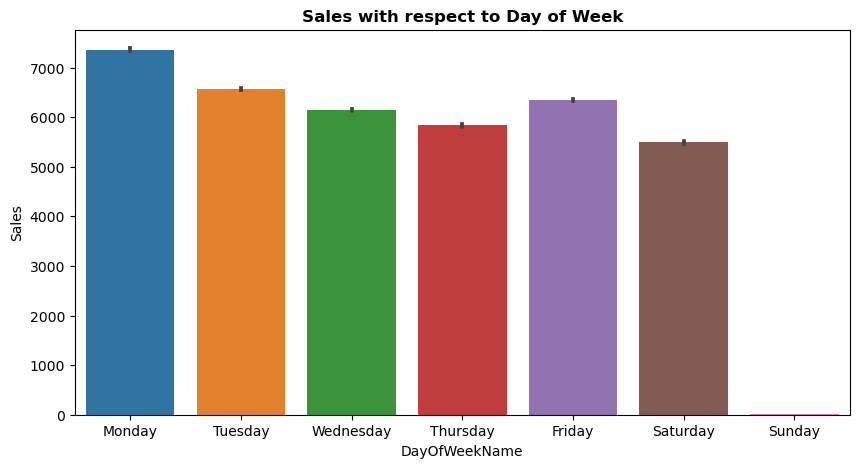

In [20]:
plt.figure(figsize=(10, 5))
order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 这行代码创建了一个列表order_days，用于指定条形图中x轴类别的顺序。
# 这是因为默认情况下，seaborn的barplot可能会根据数据中出现的顺序或者是字母顺序来排列x轴的类别

sns.barplot(data=df_rossman, x='DayOfWeekName', y='Sales', order=order_days)
plt.ylabel('Sales')
plt.title('Sales with respect to Day of Week', fontweight='bold')
plt.show()

## Regression Model

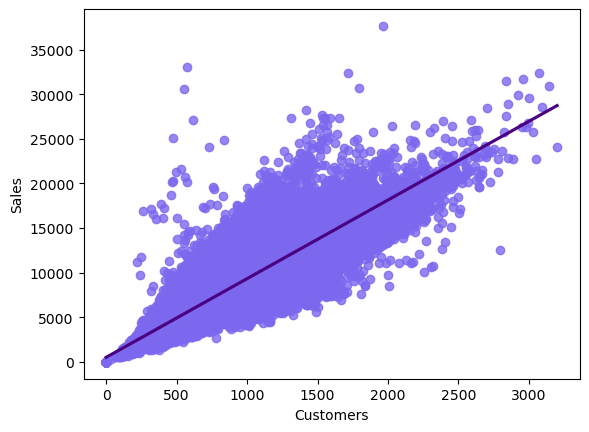

In [21]:
sns.regplot(x=df_rossman['Customers'], y=df_rossman['Sales'],color='mediumslateblue', line_kws={'color': 'indigo'});

# color='mediumslateblue'：设置散点的颜色为中板岩蓝色（medium slate blue），这将改变散点图中点的颜色。

# line_kws={'color': 'indigo'}：这是一个关键字参数字典，用于设置回归线的属性。
# 这里，'color': 'indigo'指定了回归线的颜色为靛蓝色（indigo）。line_kws允许你自定义回归线的各种风格属性，如线宽、线型、颜色等。
    
# regplot会自动计算Customers和Sales之间的线性回归模型，并将拟合的回归线绘制在散点图上。
# 这样，你可以直观地看到两个变量之间的线性关系以及散点分布情况，这对于理解变量之间的关联性和预测趋势非常有帮助。

## Sorting with Time

### Sort by days of week

In [22]:
# Sorting Monday data
ross = df_rossman[::-1]
mon = ross[ross['DayOfWeek'] == 1]
tue = ross[ross['DayOfWeek'] == 2]
wed = ross[ross['DayOfWeek'] == 3]
thu = ross[ross['DayOfWeek'] == 4]
fri = ross[ross['DayOfWeek'] == 5]
sat = ross[ross['DayOfWeek'] == 6]
sun = ross[ross['DayOfWeek'] == 7]

#check if all rows are in their categories
c1 = mon[mon['DayOfWeek']!=1]
if not c1.empty:
    print('rows not equal to 1', c1)
else:
    print('mon all good')

c2 = tue[tue['DayOfWeek']!=2]
if not c2.empty:
    print('rows not equal to 2', c2)
else:
    print('tue all good')

c3 = wed[wed['DayOfWeek']!=3]
if not c3.empty:
    print('rows not equal to 3', c3)
else:
    print('wed all good')

c4 = thu[thu['DayOfWeek']!=4]
if not c4.empty:
    print('rows not equal to 4', c4)
else:
    print('thu all good')

c5 = fri[fri['DayOfWeek']!=5]
if not c5.empty:
    print('rows not equal to 5', c5)
else:
    print('fri all good')

c6 = sat[sat['DayOfWeek']!=6]
if not c1.empty:
    print('rows not equal to 6', c6)
else:
    print('sat all good')

c7 = sun[sun['DayOfWeek']!=7]
if not c1.empty:
    print('rows not equal to 7', c7)
else:
    print('sun all good')


mon all good
tue all good
wed all good
thu all good
fri all good
sat all good
sun all good


### Sort quarterly

In [23]:
# 2013 quarterly
Q1_2013 = ross.loc['2013-01-01':'2013-03-31']
Q2_2013 = ross.loc['2013-04-01':'2013-06-30']
Q3_2013 = ross.loc['2013-07-01':'2013-09-30']
Q4_2013 = ross.loc['2013-10-01':'2013-12-31']

# 2014 quarterly
Q1_2014 = ross.loc['2014-01-01':'2014-03-31']
Q2_2014 = ross.loc['2014-04-01':'2014-06-30']
Q3_2014 = ross.loc['2014-07-01':'2014-09-30']
Q4_2014 = ross.loc['2014-10-01':'2014-12-31']

# 2015 quarterly
Q1_2015 = ross.loc['2015-01-01':'2015-03-31']
Q2_2015 = ross.loc['2015-04-01':'2015-06-30']
Q3_2015 = ross.loc['2015-07-01':'2015-07-31']

### Sort monthly

In [24]:
# 2013 monthly
jan13 = ross.loc['2013-01-01':'2013-01-31']
feb13 = ross.loc['2013-02-01':'2013-02-28']
mar13 = ross.loc['2013-03-01':'2013-03-31']
apr13 = ross.loc['2013-04-01':'2013-04-30']
may13 = ross.loc['2013-05-01':'2013-05-31']
jun13 = ross.loc['2013-06-01':'2013-06-30']
jul13 = ross.loc['2013-07-01':'2013-07-31']
aug13 = ross.loc['2013-08-01':'2013-08-31']
sep13 = ross.loc['2013-09-01':'2013-09-30']
oct13 = ross.loc['2013-10-01':'2013-10-31']
nov13 = ross.loc['2013-11-01':'2013-11-30']
dec13 = ross.loc['2013-12-01':'2013-12-31']

# 2014 monthly
jan14 = ross.loc['2014-01-01':'2014-01-31']
feb14 = ross.loc['2014-02-01':'2014-02-28']
mar14 = ross.loc['2014-03-01':'2014-03-31']
apr14 = ross.loc['2014-04-01':'2014-04-30']
may14 = ross.loc['2014-05-01':'2014-05-31']
jun14 = ross.loc['2014-06-01':'2014-06-30']
jul14 = ross.loc['2014-07-01':'2014-07-31']
aug14 = ross.loc['2014-08-01':'2014-08-31']
sep14 = ross.loc['2014-09-01':'2014-09-30']
oct14 = ross.loc['2014-10-01':'2014-10-31']
nov14 = ross.loc['2014-11-01':'2014-11-30']
dec14 = ross.loc['2014-12-01':'2014-12-31']

# 2015 monthly
jan15 = ross.loc['2015-01-01':'2015-01-31']
feb15 = ross.loc['2015-02-01':'2015-02-28']
mar15 = ross.loc['2015-03-01':'2015-03-31']
apr15 = ross.loc['2015-04-01':'2015-04-30']
may15 = ross.loc['2015-05-01':'2015-05-31']
jun15 = ross.loc['2015-06-01':'2015-06-30']
jul15 = ross.loc['2015-07-01':'2015-07-31']

# Sorting with respect to sales

## quarter sale

In [25]:
# 2013 quarter sales
Q1_2013_sales = ross.loc['2013-01-01':'2013-03-31',['Sales']]
Q2_2013_sales = ross.loc['2013-04-01':'2013-06-30',['Sales']]
Q3_2013_sales = ross.loc['2013-07-01':'2013-09-30',['Sales']]
Q4_2013_sales = ross.loc['2013-10-01':'2013-12-31',['Sales']]

# 2014 quarter sales
Q1_2014_sales = ross.loc['2014-01-01':'2014-03-31',['Sales']]
Q2_2014_sales = ross.loc['2014-04-01':'2014-06-30',['Sales']]
Q3_2014_sales = ross.loc['2014-07-01':'2014-09-30',['Sales']]
Q4_2014_sales = ross.loc['2014-10-01':'2014-12-31',['Sales']]

# 2015 quarter sales
Q1_2015_sales = ross.loc['2015-01-01':'2015-03-31',['Sales']]
Q2_2015_sales = ross.loc['2015-04-01':'2015-06-30',['Sales']]
Q3_2015_sales = ross.loc['2015-07-01':'2015-07-31',['Sales']]

### quarter sales mean line graph

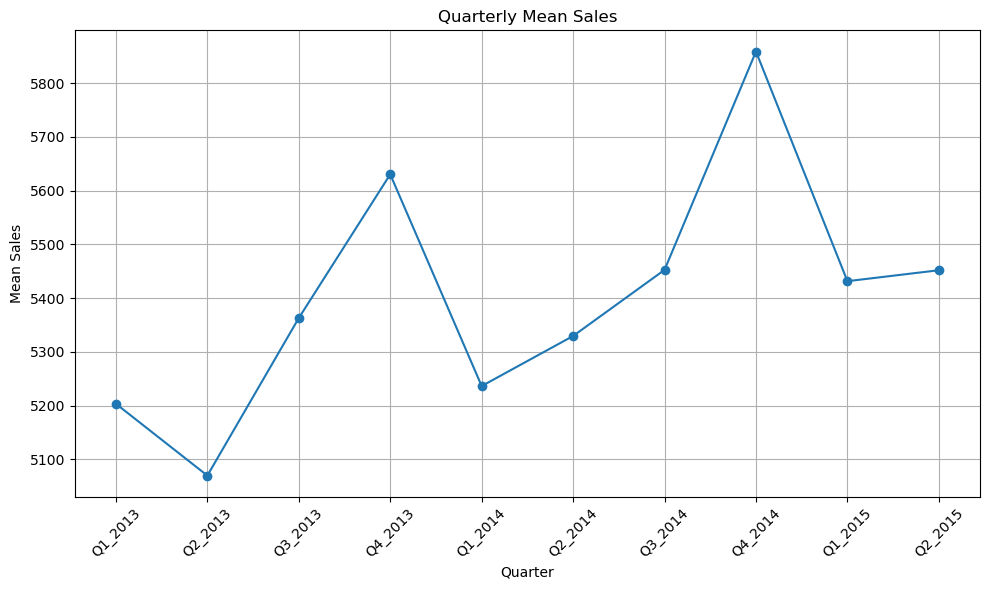

In [26]:
# Q2_2015_sales.mean()
sales_q_mean = {
    'Q1_2013': Q1_2013_sales.mean(),
    'Q2_2013': Q2_2013_sales.mean(),
    'Q3_2013': Q3_2013_sales.mean(),
    'Q4_2013': Q4_2013_sales.mean(),
    'Q1_2014': Q1_2014_sales.mean(),
    'Q2_2014': Q2_2014_sales.mean(),
    'Q3_2014': Q3_2014_sales.mean(),
    'Q4_2014': Q4_2014_sales.mean(),
    'Q1_2015': Q1_2015_sales.mean(),
    'Q2_2015': Q2_2015_sales.mean()
}

# Create a line graph for the quarter means
plt.figure(figsize=(10, 6))
plt.plot(sales_q_mean.keys(), sales_q_mean.values(), marker='o')
plt.title('Quarterly Mean Sales')
plt.xlabel('Quarter')
plt.ylabel('Mean Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()


findings:
* forth quarter usually has the most sales.

## month sales

In [27]:
sales_m = {}

for year in range(2013, 2016):
    for month in range(1, 13):
        start_date = f'{year}-{month:02d}-01'
        end_date = f'{year}-{month:02d}-{pd.Timestamp(year, month, 1).days_in_month}'
        month_key = f'{pd.Timestamp(year, month, 1).strftime("%b").lower()}{str(year)[2:]}'
        sales_m[month_key] = ross.loc[start_date:end_date, ['Sales']]

# access each month's data using the dictionary like this
sales_m['jan13']



C:\Users\nAinIng\AppData\Local\Temp\ipykernel_18200\2754108008.py:8: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  sales_m[month_key] = ross.loc[start_date:end_date, ['Sales']]
C:\Users\nAinIng\AppData\Local\Temp\ipykernel_18200\2754108008.py:8: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  sales_m[month_key] = ross.loc[start_date:end_date, ['Sales']]
C:\Users\nAinIng\AppData\Local\Temp\ipykernel_18200\2754108008.py:8: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  sales_m[month_key] = ross.loc[start_date:end_date, ['Sales']]
C:\Users\nAinIng\AppData\Local\Temp\ipykernel_18200\2754108008.py:8: FutureWarning: Value based partial slicing on non-mo

,Sales
Date,
2013-01-01,0
2013-01-02,5097
2013-01-03,4579
2013-01-04,4640
2013-01-05,3325
...,...
2013-01-27,0
2013-01-28,3549
2013-01-29,3461


### month sales mean line graph

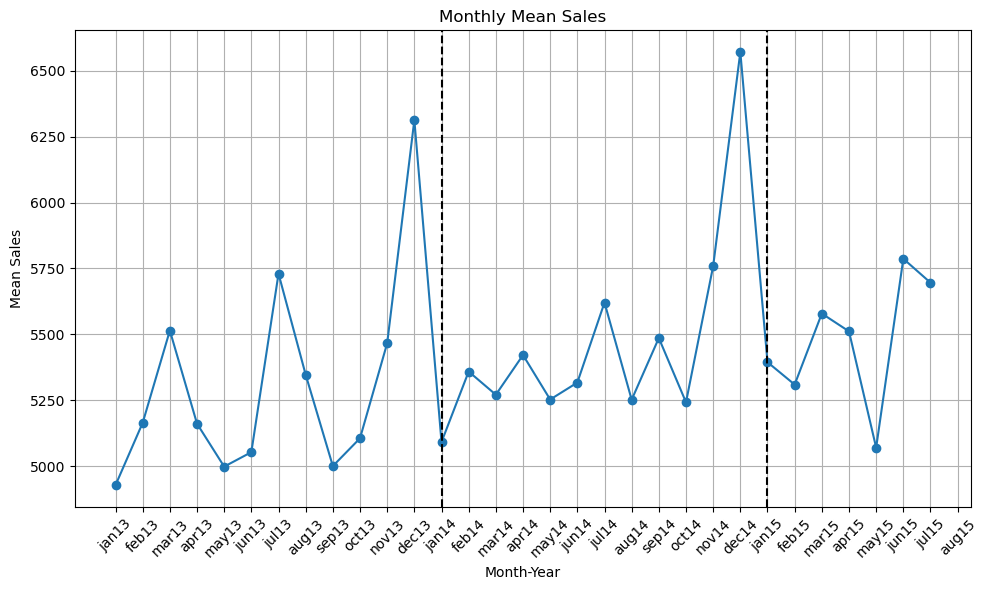

In [28]:
sales_m_mean = {}

for month_key, month_data in sales_m.items():
    mean_sales = month_data['Sales'].mean()
    sales_m_mean[month_key] = mean_sales
sales_m_mean

# Create a line graph for the means
plt.figure(figsize=(10, 6))
plt.plot(sales_m_mean.keys(), sales_m_mean.values(), marker='o')
plt.title('Monthly Mean Sales')
plt.xlabel('Month-Year')
plt.ylabel('Mean Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.axvline(x='jan14', color='black', linestyle='--')
plt.axvline(x='jan15', color='black', linestyle='--')
plt.grid()
plt.show()

findings:
* december sales is the highest in each year.
* It has an overall increasing trend.

### each day sales line graph

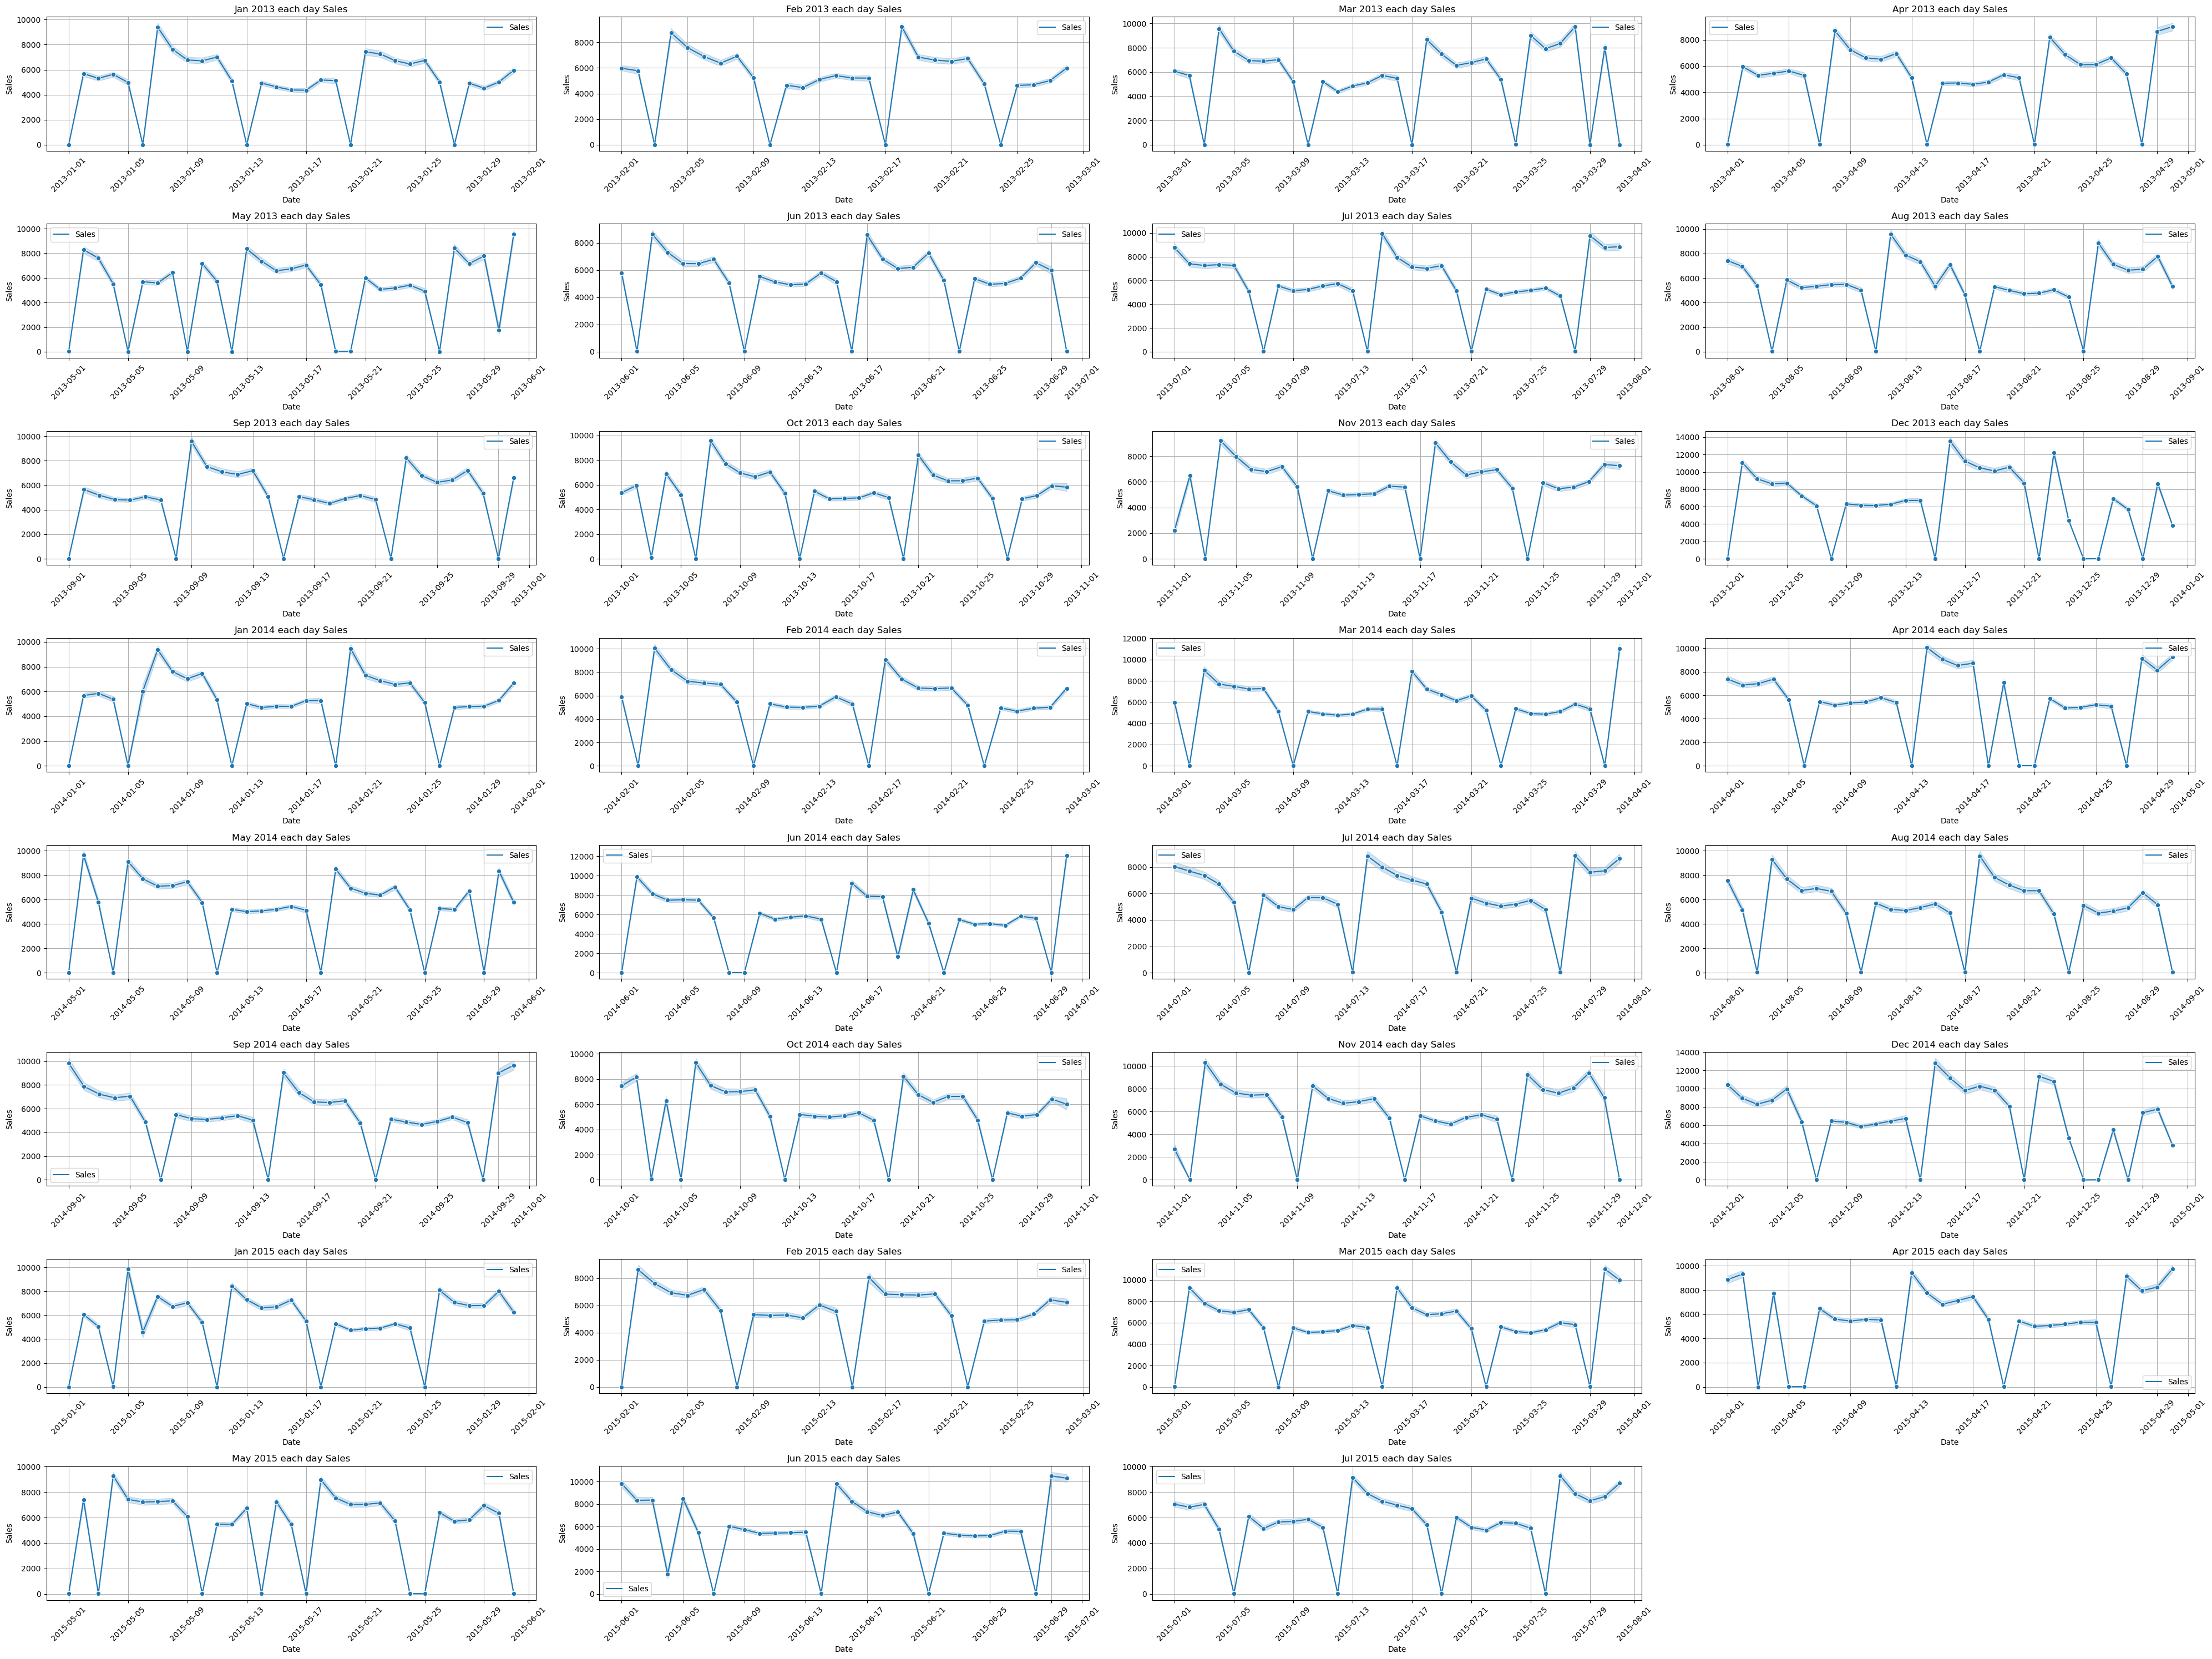

In [29]:
# Create a list of all the variables (column names)
variables = ['jan13', 'feb13', 'mar13', 'apr13', 'may13', 'jun13', 'jul13', 'aug13', 'sep13', 'oct13', 'nov13', 'dec13',
             'jan14', 'feb14', 'mar14', 'apr14', 'may14', 'jun14', 'jul14', 'aug14', 'sep14', 'oct14', 'nov14', 'dec14',
             'jan15', 'feb15', 'mar15', 'apr15', 'may15', 'jun15', 'jul15']

# Create a list of corresponding month names
months = ['Jan 2013', 'Feb 2013', 'Mar 2013', 'Apr 2013', 'May 2013', 'Jun 2013', 'Jul 2013', 'Aug 2013', 'Sep 2013', 'Oct 2013', 'Nov 2013', 'Dec 2013',
          'Jan 2014', 'Feb 2014', 'Mar 2014', 'Apr 2014', 'May 2014', 'Jun 2014', 'Jul 2014', 'Aug 2014', 'Sep 2014', 'Oct 2014', 'Nov 2014', 'Dec 2014',
          'Jan 2015', 'Feb 2015', 'Mar 2015', 'Apr 2015', 'May 2015', 'Jun 2015', 'Jul 2015']

# Create subplots
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(40, 30))
plt.subplots_adjust(hspace=0.5)

# Iterate over variables and plot the line graph
for i, var_name in enumerate(variables):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    sns.lineplot(data=sales_m[var_name], ax=ax, linestyle='-', marker='o')
    ax.set_title(f'{months[i]} each day Sales')
    ax.set_xlabel('Date')
    ax.set_ylabel('Sales')
    ax.grid(True)
    ax.tick_params(axis='x', labelrotation = 45)

# Remove empty subplots if the number of variables is not a multiple of 4
if len(variables) % 4 != 0:
    for i in range(len(variables) % 4, 4):
        fig.delaxes(axes[-1, i])

plt.tight_layout()
plt.show()

finding:
* every 5 days is a period, 
* sales spike at the start of the period.

## DoW sales

In [30]:
mon_sales = mon['Sales']
tue_sales = tue['Sales']
wed_sales = wed['Sales']
thu_sales = thu['Sales']
fri_sales = fri['Sales']
sat_sales = sat['Sales']
sun_sales = sun['Sales']

### DoW sales mean line graph

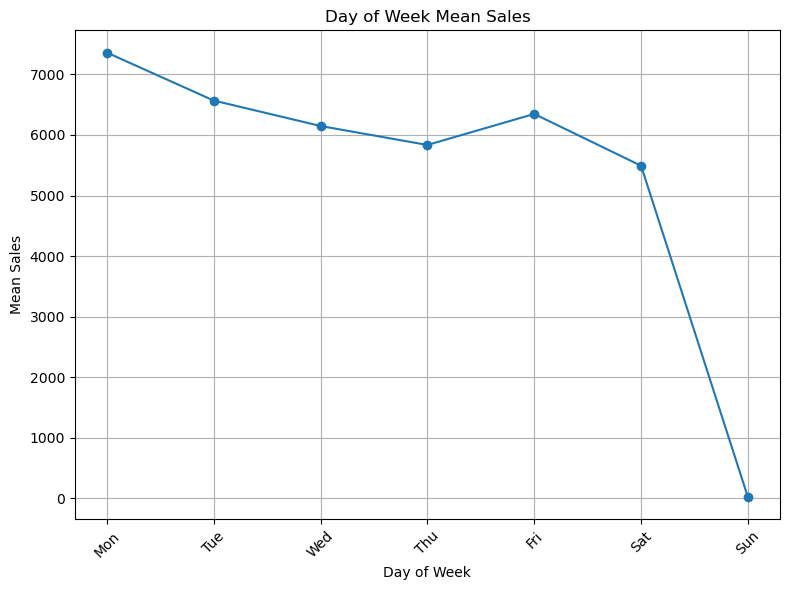

In [31]:
sales_d_mean = {
'Mon' : mon_sales.mean(),
'Tue' : tue_sales.mean(),
'Wed' : wed_sales.mean(),
'Thu' : thu_sales.mean(),
'Fri' : fri_sales.mean(),
'Sat' : sat_sales.mean(),
'Sun' : sun_sales.mean()
}

# Create a line graph for the DoW means
plt.figure(figsize=(8, 6))
plt.plot(sales_d_mean.keys(), sales_d_mean.values(), marker='o')
plt.title('Day of Week Mean Sales')
plt.xlabel('Day of Week')
plt.ylabel('Mean Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

findings:
* sales is boosted on Mon and Fri
* Sun has the least sales